In [40]:
# install modules
!pip install biopython
!pip install torch
!pip install sklearn


In [41]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
# import Libraries
import torch # PyTorch framework
import torch.nn as nn # PyTorch neural network module
import torch.optim as optim # PyTorch optimizer module
import torch.utils.data as data # PyTorch data loader module
import numpy as np # NumPy for numerical operations
import pandas as pd # Pandas for data manipulation
from Bio import SeqIO # Biopython for sequence input/output
from Bio.Seq import Seq # Biopython for sequence objects
# from Bio.Alphabet import IUPAC # Biopython for alphabet objects
from Bio.Data import CodonTable # Biopython for codon table objects
import matplotlib.pyplot as plt # Matplotlib for plotting
import pandas as pd
from Bio.Seq import translate
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import re
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



In [25]:
# Read File
seq_records = SeqIO.parse("example_dna.fa", "fasta")# read FASTA file into a list of SeqRecord objects
seq_list = [{'ID': record.id, 'DNA': str(record.seq)} for record in seq_records]


In [26]:
# Convert to DataFrame
seq_df = pd.DataFrame(seq_list)

In [27]:
seq_df.head()

,ID,DNA
0,ENST00000435737.5,ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAA...
1,ENST00000419127.5,ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAA...


In [28]:
# Convert to RNA

# Define a function to convert DNA to RNA using biopython
def dna_to_rna(dna):
  # Create a Seq object from the DNA string
  dna_seq = Seq(dna)
  # Transcribe the DNA to RNA using biopython method
  rna_seq = dna_seq.transcribe()
  # Return the RNA sequence as a string
  return str(rna_seq)

# Apply the function to the dataframe and create a new column for RNA sequences
seq_df['RNA'] = seq_df['DNA'].apply(dna_to_rna)

# Print the dataframe
seq_df.head()

,ID,DNA,RNA
0,ENST00000435737.5,ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAA...,AUGUUUCGCAUCACCAACAUUGAGUUUCUUCCCGAAUACCGACAAA...
1,ENST00000419127.5,ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAA...,AUGUUUCGCAUCACCAACAUUGAGUUUCUUCCCGAAUACCGACAAA...


In [29]:
# Define a function to convert RNA to protein using biopython
def rna_to_protein(rna):
  # Create a Seq object from the RNA string
  rna_seq = Seq(rna)
  # Translate the RNA to protein using biopython method
  protein_seq = rna_seq.translate()
  # Return the protein sequence as a string
  return str(protein_seq)

# Apply the function to the dataframe and create a new column for protein sequences
seq_df['Protein'] = seq_df['RNA'].apply(rna_to_protein)

# show the dataframe
seq_df.head()

,ID,DNA,RNA,Protein
0,ENST00000435737.5,ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAA...,AUGUUUCGCAUCACCAACAUUGAGUUUCUUCCCGAAUACCGACAAA...,MFRITNIEFLPEYRQKESREFLSVSRTVQQVINLVYTTSAFSKFYE...
1,ENST00000419127.5,ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAA...,AUGUUUCGCAUCACCAACAUUGAGUUUCUUCCCGAAUACCGACAAA...,MFRITNIEFLPEYRQKESREFLSVSRTVQQVINLVYTTSAFSKFYE...


In [30]:
# Count Number of protein present in the sequence
# Define function to count amino acids
def count_protein(seq):
    analysed_seq = ProteinAnalysis(seq) # create ProteinAnalysis object
    return sum(analysed_seq.count_amino_acids().values()) # sum up the values of the amino acid dictionary

# Apply function to protein column
seq_df["protein_count"] = seq_df["Protein"].apply(count_protein) # store in new column
# print(df["protein"].apply(count_protein)) # print out

# Display dataframe
seq_df.head()

,ID,DNA,RNA,Protein,protein_count
0,ENST00000435737.5,ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAA...,AUGUUUCGCAUCACCAACAUUGAGUUUCUUCCCGAAUACCGACAAA...,MFRITNIEFLPEYRQKESREFLSVSRTVQQVINLVYTTSAFSKFYE...,129
1,ENST00000419127.5,ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAA...,AUGUUUCGCAUCACCAACAUUGAGUUUCUUCCCGAAUACCGACAAA...,MFRITNIEFLPEYRQKESREFLSVSRTVQQVINLVYTTSAFSKFYE...,717


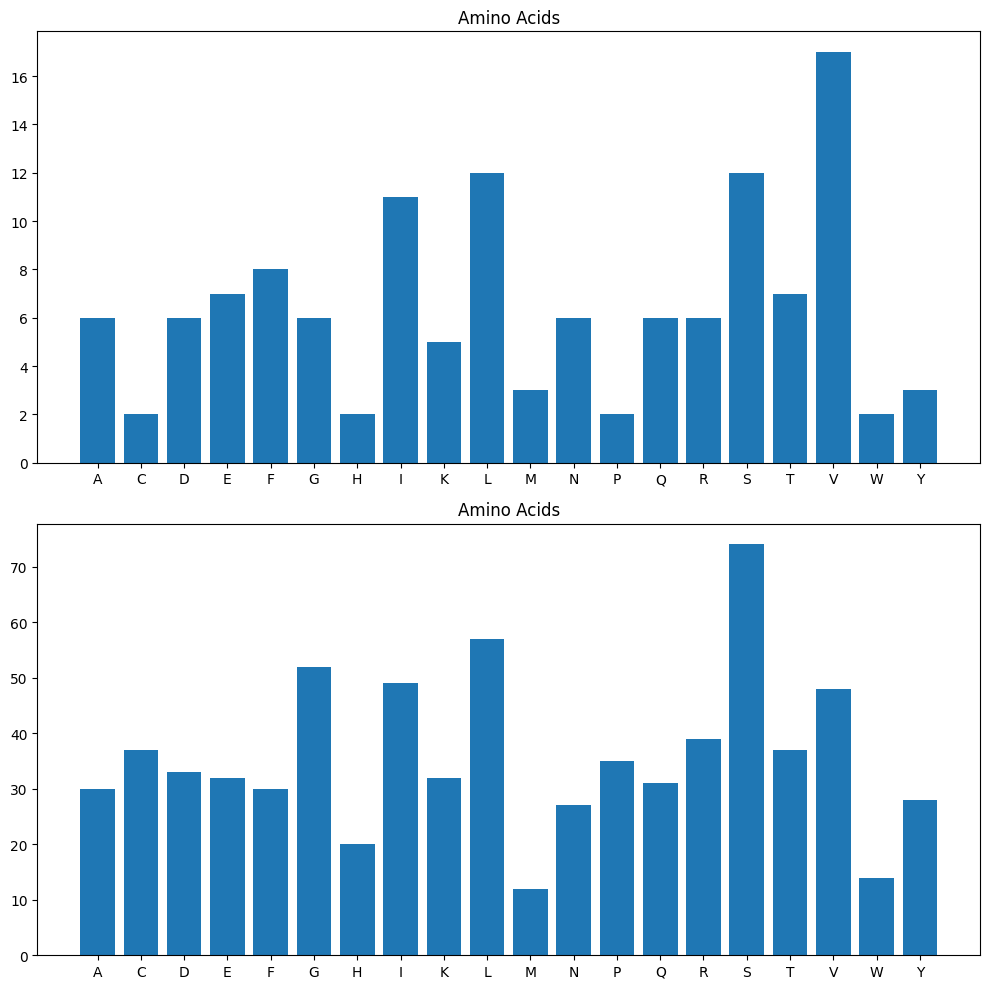

In [31]:
# Create a bargraph [figure and a subplot] to show the frequency of unique proteins
fig, ax = plt.subplots(seq_df.shape[0], 1, figsize=(10, 10))

# Loop over rows of dataframe and plot bar charts
for i, (index, row) in enumerate(seq_df.iterrows()):
    # Get protein sequence and count for each row
    protein = row["Protein"]
    protein_count = row["protein_count"]
    # Count amino acids for each protein sequence
    analysed_protein = ProteinAnalysis(protein) # create ProteinAnalysis object
    aa_count = analysed_protein.count_amino_acids() # store amino acid count in variable
    # Plot bar chart for each row
    ax[i].bar(aa_count.keys(), aa_count.values())
    # Set xtick positions and labels
    ax[i].set_xticks(range(len(aa_count)))
    ax[i].set_xticklabels(aa_count.keys())
    # Set title for each subplot
    # ax[i].set_title(f"{protein} ({protein_count} amino acids)")
    ax[i].set_title("Amino Acids")

# Adjust layout
plt.tight_layout()

# Save or show figure
plt.savefig("protein_graph.png") # save to file
# plt.show() # show on screen

___________________________________________

In [4]:

# Function to convert DNA sequence to ordinal encoding
def string_to_array(seq_string):
    seq_string = seq_string.lower()
    seq_string = re.sub('[^acgt]', 'n', seq_string)
    seq_string = np.array(list(seq_string))
    return seq_string

# Function to encode DNA sequence in an ordinal vector
def ordinal_encoder(my_array):
    label_encoder = LabelEncoder()
    label_encoder.fit(np.array(['a', 'c', 'g', 't', 'n']))
    integer_encoded = label_encoder.transform(my_array)
    float_encoded = integer_encoded.astype(float)
    float_encoded[float_encoded == 0] = 0.25  # A
    float_encoded[float_encoded == 1] = 0.50  # C
    float_encoded[float_encoded == 2] = 0.75  # G
    float_encoded[float_encoded == 3] = 1.00  # T
    float_encoded[float_encoded == 4] = 0.00  # N
    return float_encoded

# Function to perform one-hot encoding of DNA sequence
def one_hot_encoder(seq_string):
    label_encoder = LabelEncoder()
    label_encoder.fit(np.array(['a', 'c', 'g', 't', 'n']))
    int_encoded = label_encoder.transform(seq_string)
    onehot_encoder = OneHotEncoder(sparse=False, dtype=int)
    int_encoded = int_encoded.reshape(len(int_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(int_encoded)
    onehot_encoded = np.delete(onehot_encoded, -1, 1)
    return onehot_encoded

# Function to generate k-mers from DNA sequence
def Kmers_funct(seq, size):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]


In [6]:

# Load DNA sequences from file
sequences = []
for sequence in SeqIO.parse('example_dna.fa', 'fasta'):
    sequences.append(sequence.seq)



In [8]:
seq_list = [{'ID': sequence.id, 'DNA': str(sequence.seq)} for record in sequences]


In [9]:
seq_df = pd.DataFrame(seq_list)

In [10]:
seq_df

,ID,DNA
0,ENST00000419127.5,ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAA...
1,ENST00000419127.5,ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAA...


In [11]:
# Create a new column for k-mer joined sentences
seq_df['Kmers'] = seq_df.apply(lambda x: Kmers_funct(x['DNA'], size=6), axis=1)
seq_df['Kmers'] = seq_df.apply(lambda x: ' '.join(x['Kmers']), axis=1)


In [12]:

# Create a new column for gene labels (extracted from the ID column)
seq_df['Gene'] = seq_df.apply(lambda x: x['ID'].split('_')[0], axis=1)


In [15]:

# Create a new column for disease labels (extracted from the ID column)
# seq_df['Disease'] = seq_df.apply(lambda x: x['ID'].split('_')[1], axis=1)
# Create a new column for disease labels (extracted from the ID column)
def extract_disease_label(row):
    id_parts = row['ID'].split('_')
    return id_parts[1] if len(id_parts) > 1 else ''

seq_df['Disease'] = seq_df.apply(extract_disease_label, axis=1)


In [16]:
seq_df

,ID,DNA,Kmers,Gene,Disease
0,ENST00000419127.5,ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAA...,atgttt tgtttc gtttcg tttcgc ttcgca tcgcat cgca...,ENST00000419127.5,
1,ENST00000419127.5,ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAA...,atgttt tgtttc gtttcg tttcgc ttcgca tcgcat cgca...,ENST00000419127.5,


In [17]:

# Split the data into train and test sets
X_train, X_test, y_train_gene, y_test_gene, y_train_disease, y_test_disease = train_test_split(
    seq_df['Kmers'], seq_df['Gene'], seq_df['Disease'], test_size=0.2, random_state=42)


In [32]:
print(len(X_train), len(X_test), len(y_train_gene), len(y_test_gene), len(y_train_disease), len(y_test_disease))


1 1 1 1 1 1


In [18]:

# Vectorize the k-mer sentences using CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)


In [19]:
# Train the Naive Bayes classifier for gene classification
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_cv.toarray(), y_train_gene)


GaussianNB()

In [33]:
# Train the K-Nearest Neighbors classifier for disease prediction
knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(X_train_cv.toarray(), y_train_disease)


KNeighborsClassifier(n_neighbors=1)

In [42]:
# Perform gene classification and disease prediction for each DNA sequence in the test set
for i in range(len(X_test)):
    print(f"Sequence ID: {X_test.index[i]}")
    print(f"Sequence: {seq_df.loc[X_test.index[i], 'DNA']}")
    print(f"Sequence Length: {len(seq_df.loc[X_test.index[i], 'DNA'])}")

    # Ordinal encoding DNA sequence
    sequence_string = seq_df.loc[X_test.index[i], 'DNA']  # Extract the DNA sequence string from the DataFrame
    ordinal_encoded = ordinal_encoder(string_to_array(sequence_string))
    print(f"Ordinal Encoding: {ordinal_encoded}")

    # One-hot encoding DNA sequence
    one_hot_encoded = one_hot_encoder(string_to_array(sequence_string))
    print(f"One-Hot Encoding: {one_hot_encoded}")

    # K-mer counting
    k_mers = Kmers_funct(sequence_string, size=6)
    joined_sentence = ' '.join(k_mers)
    print(f"K-mers: {k_mers}")
    print(f"Joined Sentence: {joined_sentence}")

    # Gene classification using Naive Bayes Classifier
    y_pred_gene = nb_classifier.predict(X_test_cv[i].toarray())
    print(f"Predicted Gene: {y_pred_gene}")
    print(f"Actual Gene: {y_test_gene.iloc[i]}")

    # Disease prediction using K-Nearest Neighbors Classifier
    y_pred_disease = knn_classifier.predict(X_test_cv[i].toarray())
    print(f"Predicted Disease: {y_pred_disease}")
    print(f"Actual Disease: {y_test_disease.iloc[i]}")

    print("\n")


Sequence ID: 1
Sequence: ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAAAGGAGTCCAGGGAATTTCTTTCAGTGTCACGGACTGTGCAGCAAGTGATAAACCTGGTTTATACAACATCTGCCTTCTCCAAATTTTATGAGCAGTCTGTTGTTGCAGATGTCAGCAACAACAAAGGCGGCCTCCTTGTCCACTTTTGGATTGTTTTTGTCATGCCACGTGCCAAAGGCCACATCTTCTGTGAAGACTGTGTTGCCGCCATCTTGAAGGACTCCATCCAGACAAGCATCATAAACCGGACCTCTGTGGGGAGCTTGCAGGGACTGGCTGTGGACATGGACTCTGTGGTACTAAATGACAAAGGCTGCTCTCAGTACTTCTATGCAGAGCATCTGTCTCTCCACTACCCGCTGGAGATTTCTGCAGCCTCAGGGAGGCTGATGTGTCACTTCAAGCTGGTGGCCATAGTGGGCTACCTGATTCGTCTCTCAATCAAGTCCATCCAAATCGAAGCCGACAACTGTGTCACTGACTCCCTGACCATTTACGACTCCCTTTTGCCCATCCGGAGCAGCATCTTGTACAGAATTTGTGAACCCACAAGAACATTAATGTCATTTGTTTCTACAAATAATCTCATGTTGGTGACATTTAAGTCTCCTCATATACGGAGGCTCTCAGGAATCCGGGCATATTTTGAGGTCATTCCAGAACAAAAGTGTGAAAACACAGTGTTGGTCAAAGACATCACTGGCTTTGAAGGGAAAATTTCAAGCCCATATTACCCGAGCTACTATCCTCCAAAATGCAAGTGTACCTGGAAATTTCAGACTTCTCTATCAACTCTTGGCATAGCACTGAAATTCTATAACTATTCAATAACCAAGAAGAGTATGAAAGGCTGTGAGCATGGATGGTGGGAAATTAATGAGCACATGTACTGTGGCTCCTACATGGATCATCAGACAATTTTTCGAGTG

In [43]:

# Evaluate the performance of the classifiers using accuracy, precision, recall and f1-score metrics
print("Gene Classification Metrics:")
print(f"Accuracy: {accuracy_score(y_test_gene, nb_classifier.predict(X_test_cv.toarray()))*100}")
print(f"Precision: {precision_score(y_test_gene, nb_classifier.predict(X_test_cv.toarray()), average='macro')}")
print(f"Recall: {recall_score(y_test_gene, nb_classifier.predict(X_test_cv.toarray()), average='macro')}")
print(f"F1-score: {f1_score(y_test_gene, nb_classifier.predict(X_test_cv.toarray()), average='macro')}")


Gene Classification Metrics:
Accuracy: 100.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [44]:

print("Disease Prediction Metrics:")
print(f"Accuracy: {accuracy_score(y_test_disease, knn_classifier.predict(X_test_cv.toarray()))*100}")
print(f"Precision: {precision_score(y_test_disease, knn_classifier.predict(X_test_cv.toarray()), average='macro')}")
print(f"Recall: {recall_score(y_test_disease, knn_classifier.predict(X_test_cv.toarray()), average='macro')}")
print(f"F1-score: {f1_score(y_test_disease, knn_classifier.predict(X_test_cv.toarray()), average='macro')}")


Disease Prediction Metrics:
Accuracy: 100.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [47]:
# Vectorize the k-mer sentences using TfidfVectorizer
v = TfidfVectorizer(decode_error='replace', encoding='utf-8', stop_words='english', ngram_range=(1, 1), sublinear_tf=True)
X_train_tfidf = v.fit_transform(X_train)
X_test_tfidf = v.transform(X_test)

In [48]:
# Train the Naive Bayes classifier for gene classification
nb_classifier_gene = GaussianNB()
nb_classifier_gene.fit(X_train_tfidf.toarray(), y_train_gene)


GaussianNB()

In [52]:
# Train the K-Nearest Neighbors classifier for disease prediction
knn_classifier_disease = KNeighborsClassifier(n_neighbors=1)
knn_classifier_disease.fit(X_train_tfidf.toarray(), y_train_disease)


KNeighborsClassifier(n_neighbors=1)

In [53]:
# Predictions for Gene Classification
y_pred_gene = nb_classifier_gene.predict(X_test_tfidf.toarray())

In [54]:
# Predictions for Disease Prediction
y_pred_disease = knn_classifier_disease.predict(X_test_tfidf.toarray())

In [55]:
# Create confusion matrices
cm_gene = confusion_matrix(y_test_gene, y_pred_gene)
cm_disease = confusion_matrix(y_test_disease, y_pred_disease)

In [56]:
cm_gene

array([[1]])

In [57]:
cm_gene

array([[1]])

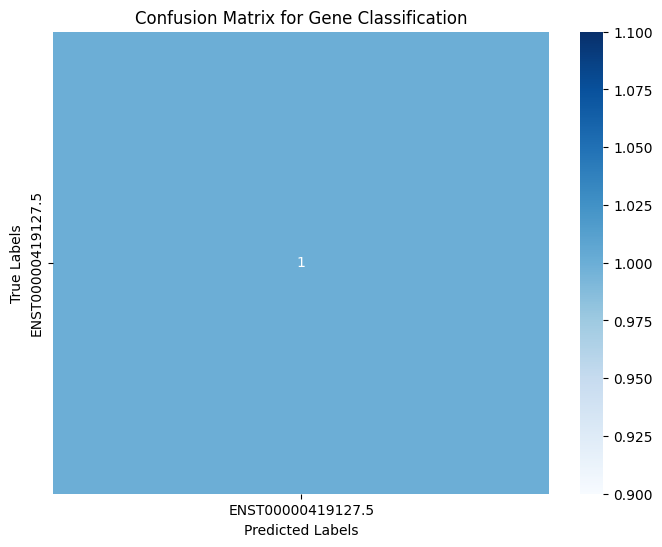

In [58]:
# Plot heatmap for Gene Classification
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gene, annot=True, fmt='d', cmap='Blues', xticklabels=nb_classifier_gene.classes_, yticklabels=nb_classifier_gene.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Gene Classification')
plt.show()


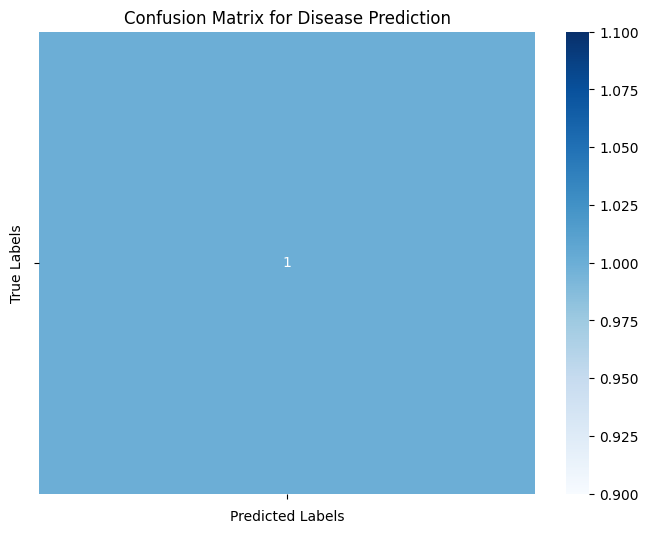

In [59]:

# Plot heatmap for Disease Prediction
plt.figure(figsize=(8, 6))
sns.heatmap(cm_disease, annot=True, fmt='d', cmap='Blues', xticklabels=knn_classifier_disease.classes_, yticklabels=knn_classifier_disease.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Disease Prediction')
plt.show()


In [61]:
np.unique(y_train_disease)

array([''], dtype=object)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense

# define the cnn-lstm model architecture
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(None, 4))) # input shape is (sequence length, one hot encoding size)
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(units=16))
model.add(Dense(units=1, activation='sigmoid')) # output layer for binary classification

# compile the model with loss function, optimizer, and metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# print the model summary
model.summary()


In [ ]:

# fit the model to the training data
model.fit(X_train, y_train_gene, epochs=10, batch_size=32)


In [ ]:

# evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test_disease)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


In [ ]:
# Split data into train and test sets
X = np.array(seq_df["encoded_sequence"].tolist())
y = np.array(seq_df["RNA"].tolist())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


OR

In [ ]:
# Define and train a CNN-LSTM model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation="relu", input_shape=(None, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(units=16))
model.add(Dense(units=1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()


In [ ]:
# Reshape X_train and X_test to fit the model input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape, 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape, 1)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10)

In [ ]:
# Evaluate the model on test set
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", acc)
print("F1 score:", f1)


In [ ]:
# Plot the training history
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["accuracy"], label="accuracy")
plt.legend()
plt.show()